# AQI Analysis
## Carmen Hoyt
### [GitHub Repo](https://github.com/ceh58/thomas-fire-analysis)

### About:
- Purpose: 

This analysis uses Air Quality Index (AQI) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 Thomas Fire.

- Highlights:

This task uses `pandas` to wrangle dataframes. It requires working with various datatypes, such as dates (and using `to_datetime()`. With `matplotlib.pyplot`, we can create engaging visualizations!
  
- Dataset description:

AQI Data:

This analysis directly imports the US AQI (by county) data for [2017](https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip) and [2018](https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip) via zip file. Both datasets will need to be filtered for Santa Barbara county.
Accessed: October 22, 2024

- References:

AQI Data:

U.S. Enivornmental Protection Agency. (2024). Air Quality Index Daily Values Report: July 2024 (2024.07.23). [https://www.epa.gov/outdoor-air-quality-data/air-quality-index-daily-values-report](https://www.epa.gov/outdoor-air-quality-data/air-quality-index-daily-values-report)

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in data
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip", compression = 'zip')
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip", compression = 'zip')

In [3]:
# Concat the two data frames
aqi = pd.concat([aqi_17, aqi_18])

In [4]:
# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_'))

In [5]:
# Select only data from Santa Barbara County
aqi_sb = aqi[aqi['county_name'] == "Santa Barbara"]

In [6]:
# Remove `state_name`, `county_name`, `state_code`, and `county_code` columns
aqi_sb = aqi_sb.drop(columns = ['state_name', 'county_name', 'state_code', 'county_code'])

In [7]:
# Update `date` to datetime object
aqi_sb.date = pd.to_datetime(aqi_sb.date)

In [8]:
# Update the index to be the date column
aqi_sb = aqi_sb.set_index('date')

In [9]:
# Add AQI 5-day rolling mean to `aqi_sb` data frame
aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling('5D').mean()

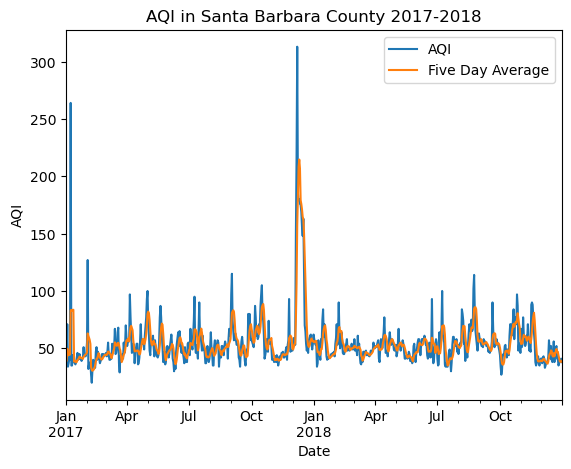

In [10]:
# Plot AQI and AQI rolling mean 
aqi_sb.drop(columns = 'number_of_sites_reporting').plot.line(y = ['aqi', 'five_day_average'])
plt.title("AQI in Santa Barbara County 2017-2018")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend(['AQI', 'Five Day Average'])

In [11]:
aqi_17.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1
